# Naive Bayes implementation from scratch

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Exploring Data

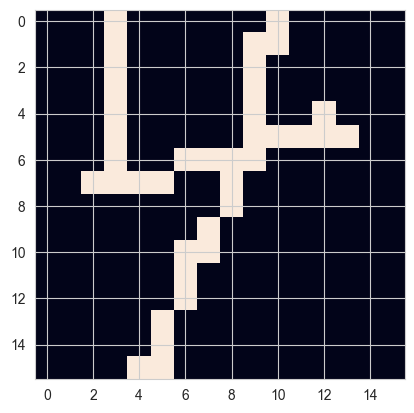

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
img2=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,
1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,
0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.uint8)
img4=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,
1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,
0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.uint8)
img = np.reshape(img4,(16,16),order='F')
plt.imshow(img)

### Load Training and Testing Data

In [24]:
# Load training and testing data
trainX = np.loadtxt("trainX.txt")        # features (0/1 pixels)
trainY = np.loadtxt("trainY.txt", dtype=int)  # labels (2 or 4)
testX  = np.loadtxt("testX.txt")         # features
testY  = np.loadtxt("testY.txt", dtype=int)   # labels

print("Training set shape:", trainX.shape, trainY.shape)
print("Testing set shape:", testX.shape, testY.shape)


Training set shape: (500, 256) (500,)
Testing set shape: (100, 256) (100,)


In [45]:
# compute prior probability --> frequency of each class
# P(y)

classes, counts = np.unique(trainY, return_counts=True)
print(counts)
priors = counts / len(trainY)
priors_dict = dict(zip(classes, priors))

print("Classes:", classes)
print("Priors:", priors)
print("Priors Dict: ", priors_dict)


[250 250]
Classes: [2 4]
Priors: [0.5 0.5]
Priors Dict:  {np.int64(2): np.float64(0.5), np.int64(4): np.float64(0.5)}


In [46]:
# find likelihood
num_features = trainX.shape[1]
likelihoods = {}

for c in classes:
    X_c = trainX[trainY == c]

    likelihoods[c] = (np.sum(X_c , axis=0)+1)/(X_c.shape[0]+2)


In [51]:
conditional_prob = {}  # dict to hold P(xi|y=c) for each class

for c in classes:
    X_c = trainX[trainY == c]

    feature_counts = np.sum(X_c, axis=0)
    p1 = (feature_counts + 1) / (X_c.shape[0] + 2)  # P(xi=1|y=c)
    p0 = 1 - p1                                     # P(xi=0|y=c)

    conditional_prob[c] = {
        1: p1,
        0: p0
    }


for c in classes:
    print(f"Class {c}:")
    print(f"P(x=1 | y={c}):", conditional_prob[c][1])
    print(f"P(x=0 | y={c}):", conditional_prob[c][0])


Class 2:
P(x=1 | y=2): [0.01190476 0.03571429 0.07142857 0.10714286 0.09126984 0.07539683
 0.04365079 0.01984127 0.01190476 0.00793651 0.01587302 0.02777778
 0.03571429 0.05952381 0.05555556 0.02380952 0.03571429 0.1031746
 0.13095238 0.13492063 0.11111111 0.09126984 0.03174603 0.00396825
 0.00396825 0.00793651 0.02777778 0.04365079 0.09126984 0.11507937
 0.14285714 0.07936508 0.09920635 0.21031746 0.23015873 0.1984127
 0.1547619  0.0952381  0.03571429 0.01587302 0.00396825 0.01587302
 0.05952381 0.11111111 0.20634921 0.27777778 0.29761905 0.23412698
 0.23412698 0.32142857 0.28968254 0.21428571 0.13492063 0.05555556
 0.03174603 0.01190476 0.00793651 0.01984127 0.0952381  0.1547619
 0.29761905 0.38095238 0.33333333 0.33333333 0.37698413 0.32539683
 0.21428571 0.17063492 0.09126984 0.03968254 0.01984127 0.00793651
 0.00396825 0.04365079 0.12698413 0.24603175 0.37301587 0.50396825
 0.43253968 0.39285714 0.55555556 0.35714286 0.23015873 0.1468254
 0.06349206 0.02380952 0.00396825 0.0079365

### Prediction Function

In [52]:
def predict(x, classes, priors, cond_prob):
    posteriors = {}

    for c in classes:
        log_prob = np.log(priors[c])

        for i in range(len(x)):
            log_prob += np.log(cond_prob[c][x[i]][i])

        posteriors[c] = log_prob

    return max(posteriors, key=posteriors.get)


### Evaluate Accuracy

In [53]:
def evaluate(X, Y, classes, priors, conditional_prob):
    preds = []
    for i in range(len(X)):
        preds.append(predict(X[i], classes, priors, conditional_prob))
    preds = np.array(preds)
    acc = np.mean(preds == Y)
    return acc, preds


# Training accuracy
train_acc, train_preds = evaluate(trainX, trainY, classes, priors_dict, conditional_prob)
print("Training Accuracy:", train_acc)

# Testing accuracy
test_acc, test_preds = evaluate(testX, testY, classes, priors_dict, conditional_prob)
print("Testing Accuracy:", test_acc)


Training Accuracy: 0.988
Testing Accuracy: 1.0


### Evaluation for each class

In [54]:
for c in classes:
    train_mask = (trainY == c)
    test_mask = (testY == c)

    train_acc_c = np.mean(train_preds[train_mask] == trainY[train_mask])
    test_acc_c = np.mean(test_preds[test_mask] == testY[test_mask])

    print(f"\nClass {c}:")
    print(f" Training Accuracy = {train_acc_c:.4f}")
    print(f" Testing Accuracy  = {test_acc_c:.4f}")



Class 2:
 Training Accuracy = 0.9840
 Testing Accuracy  = 1.0000

Class 4:
 Training Accuracy = 0.9920
 Testing Accuracy  = 1.0000
